In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
df = pd.read_csv("heart-disease.csv")
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [3]:
df["target"].isna().value_counts()

target
False    303
Name: count, dtype: int64

In [4]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

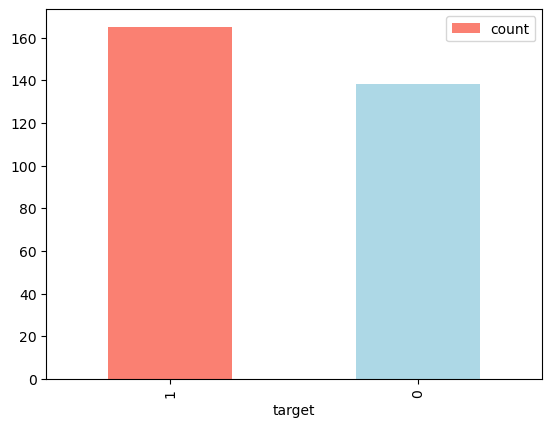

In [5]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);
plt.legend()

In [6]:
pd.crosstab(df["target"], df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


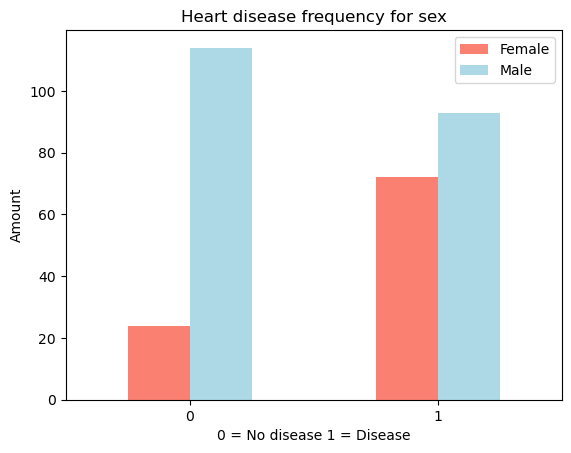

In [7]:
pd.crosstab(df["target"], df["sex"]).plot(kind="bar", color=["salmon", "lightblue"]);
plt.title("Heart disease frequency for sex")
plt.xlabel("0 = No disease 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

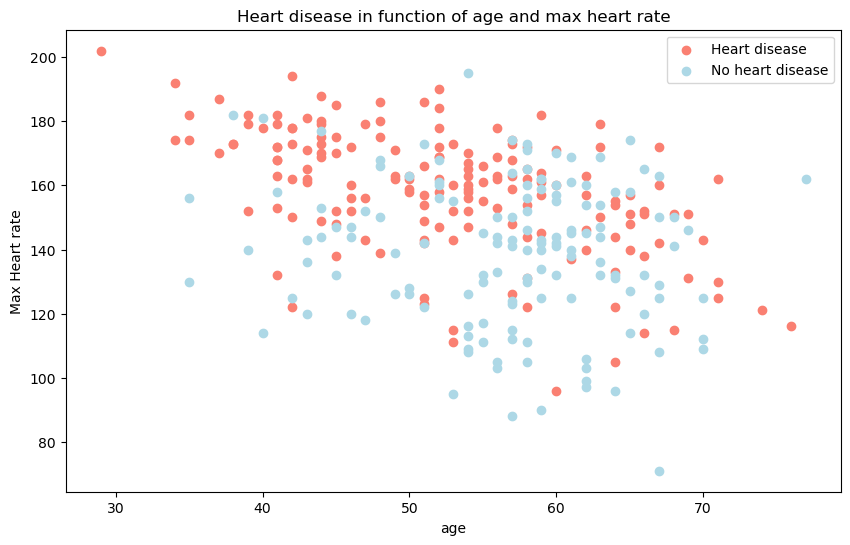

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df["target"] == 1], df.thalach[df.target==1], color="salmon")
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0], color='lightblue');
plt.title("Heart disease in function of age and max heart rate")
plt.xlabel("age")
plt.ylabel("Max Heart rate")
plt.legend(["Heart disease", "No heart disease"]);

# df.age[df.target==1]

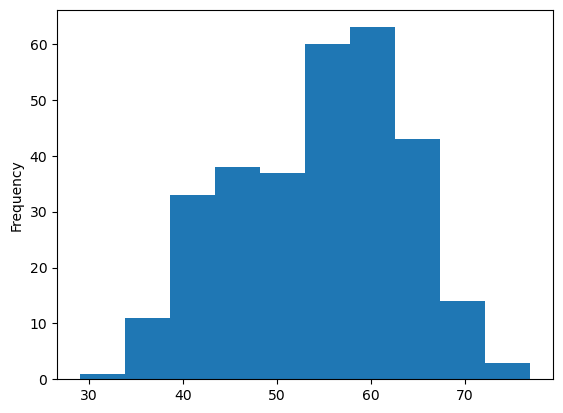

In [9]:
df.age.plot.hist();

In [10]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


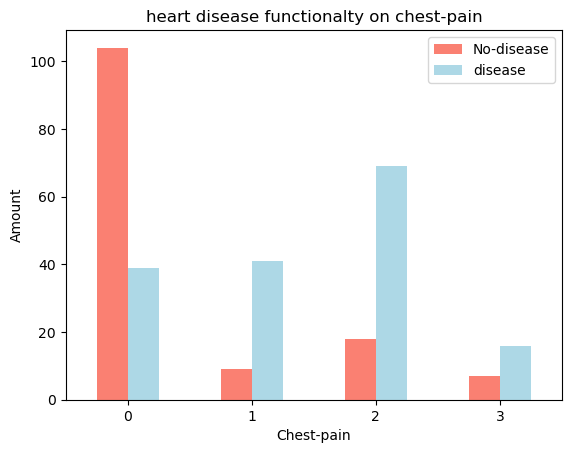

In [11]:
pd.crosstab(df.cp, df.target).plot(kind="bar", color=["salmon", "lightblue"])
plt.title("heart disease functionalty on chest-pain")
plt.xlabel("Chest-pain")
plt.ylabel("Amount")
plt.legend(["No-disease", "disease"])
plt.xticks(rotation=0);

# correlation of data matrix in df

In [12]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


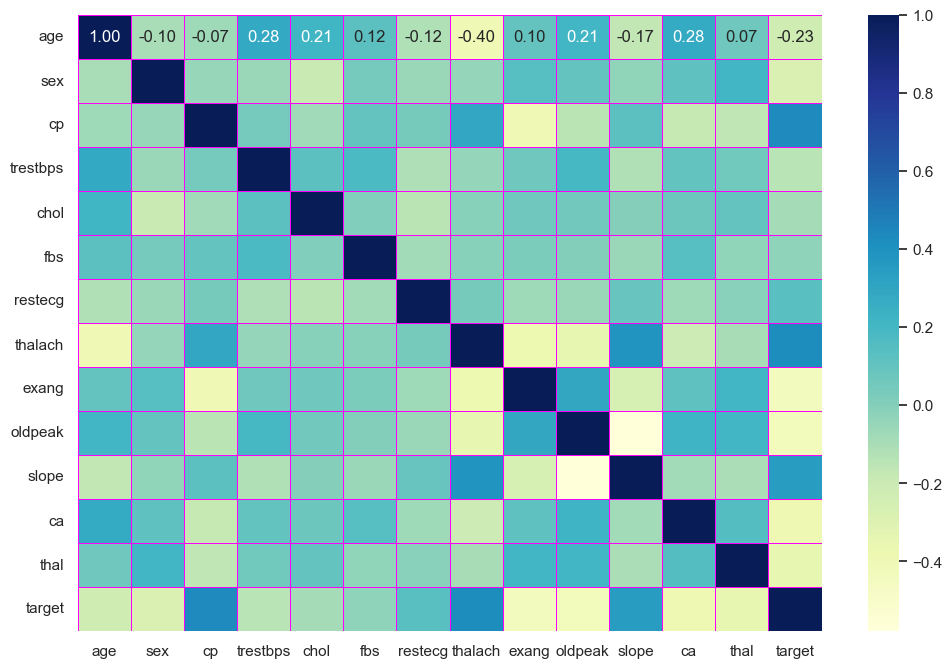

In [13]:
# lets make it prettier
sns.set(font_scale=1)
corr_matrix = df.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 linecolor="magenta",
                 cmap="YlGnBu");

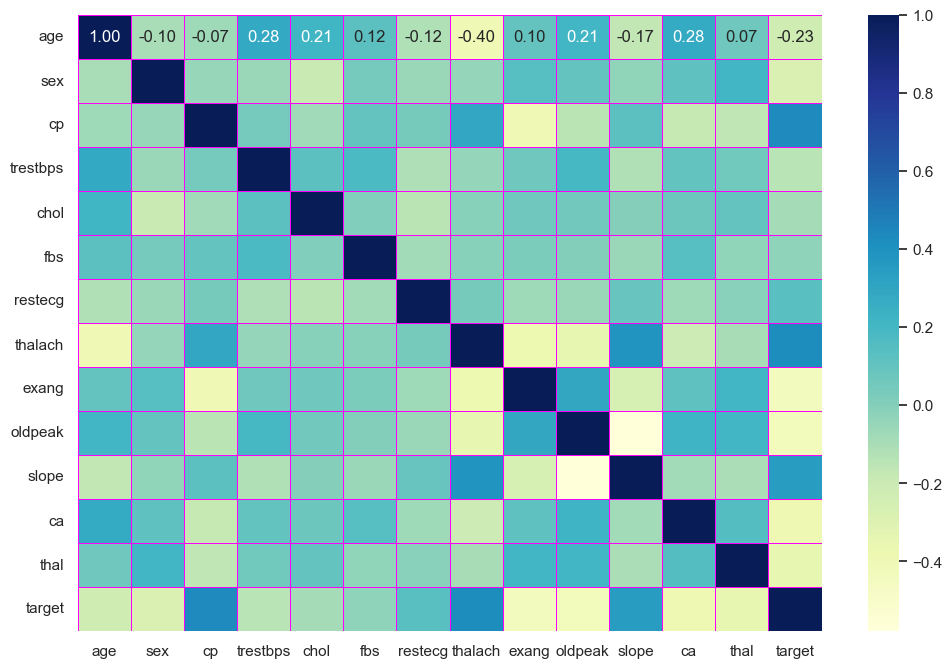

In [14]:
# lets make it prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.heatmap(corr_matrix,annot=True, linewidths=0.5, fmt=".2f", linecolor="magenta", cmap="YlGnBu");

In [15]:
x = df.drop("target", axis=1)
y = df["target"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [16]:
model_matrix = {"Logistic Regression":LogisticRegression(),
                "KNN":KNeighborsRegressor(),
                "Random forest cls":RandomForestClassifier()}

def fit_score_model(model, x_train, x_test, y_train, y_test):
    score={}
    np.random.seed(42)
    for name, model in model_matrix.items():
        model.fit(x_train, y_train)
        score[name] = model.score(x_test, y_test)
    return score

In [17]:
mode_score = fit_score_model(model_matrix, x_train, x_test, y_train, y_test)
mode_score

C:\Users\muham\conda_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8360655737704918,
 'KNN': 0.09221505376344064,
 'Random forest cls': 0.8032786885245902}

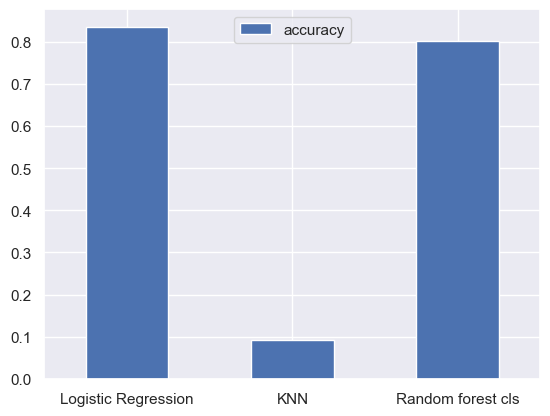

In [18]:
model_compare = pd.DataFrame(mode_score, index=["accuracy"])
model_compare.T.plot.bar()
plt.xticks(rotation=0);

In [19]:
train_score = []
test_score = []

neighbours = range(1,21)
knn = KNeighborsRegressor()
for i in neighbours:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train, y_train)
    train_score.append(knn.score(x_train, y_train))
    test_score.append(knn.score(x_test, y_test))
train_score, test_score

([1.0,
  0.5944928137092317,
  0.44260180578588537,
  0.4314538419016032,
  0.40469872857932554,
  0.3562050856826977,
  0.3202017125258064,
  0.2893173023770039,
  0.2568024077145137,
  0.25721116639027086,
  0.25497512437810976,
  0.24298357748295574,
  0.22346845653389857,
  0.23334997348856645,
  0.22499355076469507,
  0.21694263059701502,
  0.20886101977616722,
  0.2166490933535341,
  0.21930283945002615,
  0.21406854615809845],
 [-0.8365591397849466,
  -0.24623655913978526,
  -0.07132616487455223,
  0.0694220430107525,
  0.09221505376344064,
  0.07807646356033415,
  0.10849242922975622,
  0.13398857526881702,
  0.12706756936147612,
  0.17945161290322575,
  0.13809650759797376,
  0.14093488649940245,
  0.1321753515301899,
  0.11250822909809088,
  0.1062078853046593,
  0.10964801747311814,
  0.13028983889571,
  0.10560865525023211,
  0.10842939266672613,
  0.09992204301075236])

max_score of knn on test0.17945161290322575


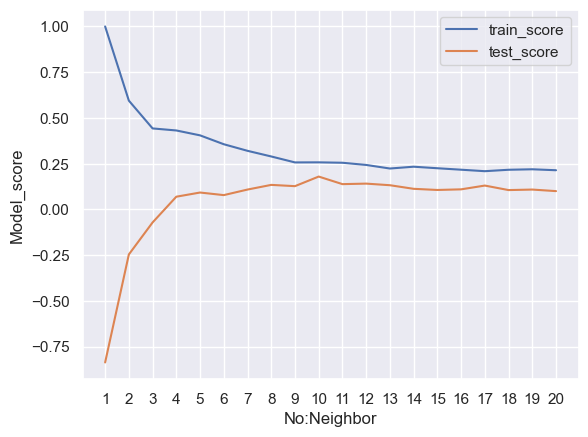

In [20]:
plt.plot(neighbours, train_score, label="train_score")
plt.plot(neighbours, test_score, label="test_score")
plt.xticks(range(1,21,1))
plt.xlabel("No:Neighbor")
plt.ylabel("Model_score")
plt.legend()

print(f"max_score of knn on test{max(test_score)}")

In [21]:
log_red_grid = {"C":np.logspace(-4, 4, 40),
                "solver":["newton-cg"]}

rf_grid = {"n_estimators":np.arange(1,1000,50),
           "max_depth":[None, 2, 4, 8, 10, 12, 14, 20],
           "min_samples_split":np.arange(2, 40, 2),
           "min_samples_leaf":np.arange(1, 30, 2)}

In [22]:
np.random.seed(42)
lg_rs = RandomizedSearchCV(LogisticRegression(), log_red_grid, cv=5, n_iter=20, verbose=True)
lg_rs.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 1.60371874e-04, 2.57191381e-04, 4.12462638e-04,
       6.61474064e-04, 1.06081836e-03, 1.70125428e-03, 2.72833338e-03,
       4.37547938e-03, 7.01703829e-03, 1.12533558e-02, 1.80472177e-02,
       2.89426612e-02, 4.64158883e-02, 7.44380301e-02, 1.19377664e-01,
       1.91448198e-0...652287e-01,
       1.26638017e+00, 2.03091762e+00, 3.25702066e+00, 5.22334507e+00,
       8.37677640e+00, 1.34339933e+01, 2.15443469e+01, 3.45510729e+01,
       5.54102033e+01, 8.88623816e+01, 1.42510267e+02, 2.28546386e+02,
       3.66524124e+02, 5.87801607e+02, 9.42668455e+02, 1.51177507e+03,
       2.42446202e+03, 3.88815518e+03, 6.23550734e+03, 1.00000000e+04]),
                                        'solver': ['newton-cg']},
                   verbose=True)

In [23]:
lg_rs.score(x_test, y_test)

0.8032786885245902

In [24]:
lg_rs.best_params_

{'solver': 'newton-cg', 'C': 0.7896522868499725}

In [25]:
np.random.seed(42)
rf_rs = RandomizedSearchCV(RandomForestClassifier(), rf_grid, cv=5, n_iter=20, verbose=True)
rf_rs.fit(x_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 2, 4, 8, 10, 12, 14,
                                                      20],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38]),
                                        'n_estimators': array([  1,  51, 101, 151, 201, 251, 301, 351, 401, 451, 501, 551, 601,
       651, 701, 751, 801, 851, 901, 951])},
                   verbose=True)

In [26]:
rf_rs.best_params_

{'n_estimators': 201,
 'min_samples_split': 28,
 'min_samples_leaf': 29,
 'max_depth': 2}

In [27]:
rf_rs.score(x_test, y_test)

0.8032786885245902

In [28]:
np.random.seed(42)
lg_rs = GridSearchCV(LogisticRegression(), log_red_grid, cv=5, verbose=True)
lg_rs.fit(x_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.60371874e-04, 2.57191381e-04, 4.12462638e-04,
       6.61474064e-04, 1.06081836e-03, 1.70125428e-03, 2.72833338e-03,
       4.37547938e-03, 7.01703829e-03, 1.12533558e-02, 1.80472177e-02,
       2.89426612e-02, 4.64158883e-02, 7.44380301e-02, 1.19377664e-01,
       1.91448198e-01, 3.07029063e-01, 4.923882...652287e-01,
       1.26638017e+00, 2.03091762e+00, 3.25702066e+00, 5.22334507e+00,
       8.37677640e+00, 1.34339933e+01, 2.15443469e+01, 3.45510729e+01,
       5.54102033e+01, 8.88623816e+01, 1.42510267e+02, 2.28546386e+02,
       3.66524124e+02, 5.87801607e+02, 9.42668455e+02, 1.51177507e+03,
       2.42446202e+03, 3.88815518e+03, 6.23550734e+03, 1.00000000e+04]),
                         'solver': ['newton-cg']},
             verbose=True)

In [29]:
lg_rs.best_params_

{'C': 0.49238826317067363, 'solver': 'newton-cg'}

In [30]:
lg_rs.score(x_test,y_test)

0.8032786885245902

In [31]:
rf_grid = {"n_estimators":np.arange(1,1000,100),
           "max_depth":[None, 2, 4],
           "min_samples_split":np.arange(2, 10, 4),
           "min_samples_leaf":np.arange(1, 10, 4)}

In [32]:
np.random.seed(42)
rf_rs = GridSearchCV(RandomForestClassifier(), rf_grid, cv=2, verbose=True)
rf_rs.fit(x_train, y_train)

Fitting 2 folds for each of 180 candidates, totalling 360 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 2, 4],
                         'min_samples_leaf': array([1, 5, 9]),
                         'min_samples_split': array([2, 6]),
                         'n_estimators': array([  1, 101, 201, 301, 401, 501, 601, 701, 801, 901])},
             verbose=True)

In [33]:
rf_rs.best_params_, rf_rs.score(x_test, y_test)

({'max_depth': None,
  'min_samples_leaf': 5,
  'min_samples_split': 2,
  'n_estimators': 201},
 0.8032786885245902)

#### gridSearch best for RandomForestClassifier
#### LogisticRegression Same for both

In [34]:
y_preds = lg_rs.predict(x_test)

In [35]:
y_preds

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [36]:
clf = lg_rs

In [37]:
clf

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.60371874e-04, 2.57191381e-04, 4.12462638e-04,
       6.61474064e-04, 1.06081836e-03, 1.70125428e-03, 2.72833338e-03,
       4.37547938e-03, 7.01703829e-03, 1.12533558e-02, 1.80472177e-02,
       2.89426612e-02, 4.64158883e-02, 7.44380301e-02, 1.19377664e-01,
       1.91448198e-01, 3.07029063e-01, 4.923882...652287e-01,
       1.26638017e+00, 2.03091762e+00, 3.25702066e+00, 5.22334507e+00,
       8.37677640e+00, 1.34339933e+01, 2.15443469e+01, 3.45510729e+01,
       5.54102033e+01, 8.88623816e+01, 1.42510267e+02, 2.28546386e+02,
       3.66524124e+02, 5.87801607e+02, 9.42668455e+02, 1.51177507e+03,
       2.42446202e+03, 3.88815518e+03, 6.23550734e+03, 1.00000000e+04]),
                         'solver': ['newton-cg']},
             verbose=True)

In [40]:
clf = LogisticRegression(C=0.20433597178569418, solver="newton-cg")

In [41]:
clf.fit(x_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='newton-cg')

In [42]:
clf.coef_

array([[-3.67179267e-04, -7.28504573e-01,  7.09238953e-01,
        -1.62316393e-02, -3.36281494e-03, -3.05885806e-02,
         2.14182382e-01,  2.25926864e-02, -5.08132121e-01,
        -5.40486183e-01,  2.12719710e-01, -5.75730881e-01,
        -8.73233397e-01]])

In [45]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))

In [46]:
feature_dict

{'age': -0.00036717926676239486,
 'sex': -0.7285045725157101,
 'cp': 0.7092389532015777,
 'trestbps': -0.016231639305539006,
 'chol': -0.003362814936075858,
 'fbs': -0.03058858063005229,
 'restecg': 0.21418238188480554,
 'thalach': 0.022592686379160423,
 'exang': -0.5081321208030449,
 'oldpeak': -0.5404861828181535,
 'slope': 0.2127197096081909,
 'ca': -0.5757308812563141,
 'thal': -0.8732333967249349}

In [48]:
feature_df = pd.DataFrame(feature_dict, index=[0])

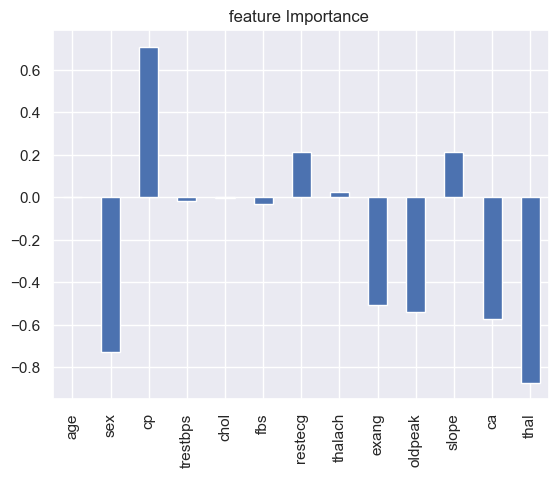

In [52]:
feature_df.T.plot.bar(title="feature Importance ", legend=False);

<Axes: xlabel='slope'>

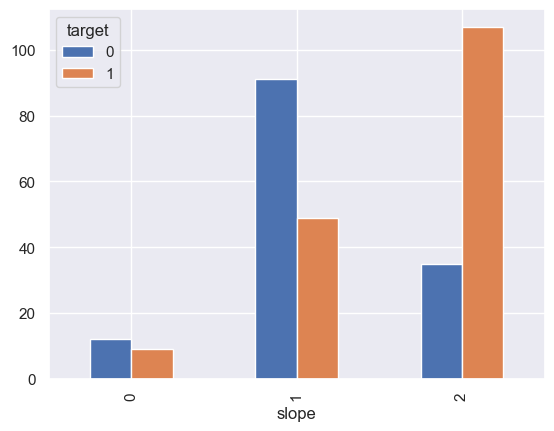

In [56]:
pd.crosstab(df["slope"], df["target"]).plot.bar()

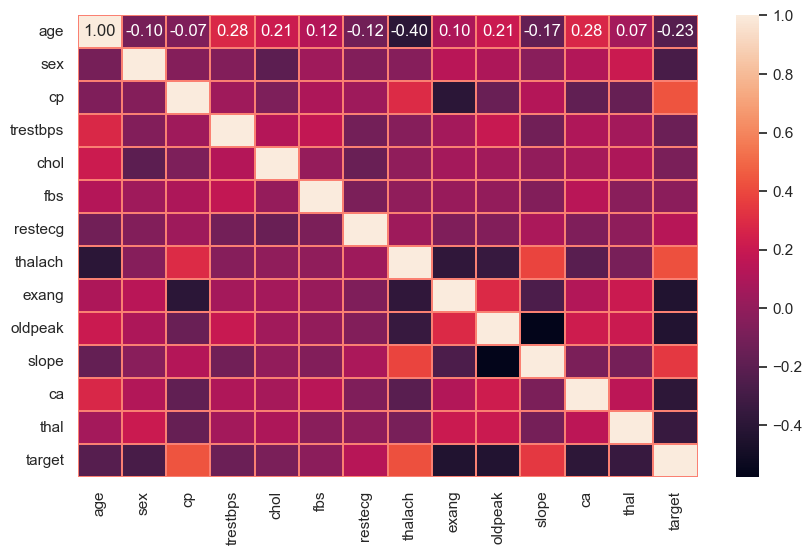

In [69]:
corr_matrix = df.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=1.2, linecolor="salmon");

